In [91]:
import numpy as np
import pandas as pd

In [92]:
import tensorflow
from tensorflow.keras.layers import LSTM

In [93]:
emotions_df=pd.read_csv("text.csv")

In [94]:
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [95]:
gender_df=pd.read_csv("Train.csv")

In [96]:
gender_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [97]:
hate_df=pd.read_csv("labeled_data.csv")

In [98]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [99]:
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [100]:
gender_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [101]:
from nltk.corpus import stopwords


In [102]:
gender_df.shape

(39650, 3)

In [103]:
gender_df.drop(columns=['Tweet_ID'],inplace=True)
emotions_df.drop(columns=['Unnamed: 0'],inplace=True)


In [104]:
hate_df=hate_df[['tweet','class']]

In [105]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [106]:
gender_df.rename(columns={ 'tweet':'text','type':'label'},inplace=True)

In [107]:
hate_df.rename(columns={ 'tweet':'text','class':'label'},inplace=True)


In [108]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [109]:
gender_df.head()

,text,label
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [110]:
emotions_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [111]:
hate_df.isnull().sum()

text     0
label    0
dtype: int64

In [112]:
emotions_df.isnull().sum()

text     0
label    0
dtype: int64

In [113]:
gender_df.isnull().sum()

text     0
label    0
dtype: int64

In [114]:
hate_df.shape

(24783, 2)

In [115]:
emotions_df.shape

(416809, 2)

In [116]:
gender_df.shape

(39650, 2)

In [117]:
emotions_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [118]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [119]:
gender_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [120]:
e_df=pd.DataFrame()

In [121]:
for i in range(6):
    subeset=emotions_df[emotions_df['label']==i].sample(n=2000,random_state=42)
    e_df=pd.concat([e_df,subeset])


In [122]:
e_df.head()


,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0
148369,i could write a whole lot more about why im fe...,0
134438,i always seem to feel inadequate,0


In [123]:
e_df.shape

(12000, 2)

In [124]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [125]:
hat_df=pd.DataFrame()

In [126]:

subset=hate_df[hate_df['label']==1].sample(6500,random_state=42)
hat_df=pd.concat([hat_df,subset])


In [127]:

subset=hate_df[hate_df['label']==0].sample(1430,random_state=42)
hat_df=pd.concat([hat_df,subset])

In [128]:
hat_df.head()

,text,label
22889,Why is it everytime I go to cracker barrel the...,1
20565,"Run that nigga, you don't want that nigga, but...",1
10780,I need a girl from Jamaica I can't fuck with t...,1
17261,RT @ShadowBeatz_Inc: I know you have me blocke...,1
13954,Put ya hands up if you a Grade A bitch,1


In [129]:
hat_df.shape

(7930, 2)

In [130]:

subset=hate_df[hate_df['label']==2].sample(4070,random_state=42)
hat_df=pd.concat([hat_df,subset])

In [131]:
hat_df.shape

(12000, 2)

In [132]:
hat_df['label'].value_counts()

label
1    6500
2    4070
0    1430
Name: count, dtype: int64

In [133]:
gender_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [134]:
ge_df=pd.DataFrame()

In [135]:
#we just want 4998 rows from the sexual_violence label
sexual_violence = gender_df[gender_df['label'] == 'sexual_violence'].sample(n = 4998, random_state = 42)
violence_df = gender_df[gender_df['label'] != 'sexual_violence']

In [136]:
violence_df=pd.concat([sexual_violence,violence_df],axis=0)

In [137]:
violence_df.shape

(12000, 2)

In [138]:
e_df.shape

(12000, 2)

In [139]:
hat_df.shape

(12000, 2)

In [140]:
violence_df.shape

(12000, 2)

In [141]:
e_df.reset_index(drop=True,inplace=True)

In [142]:
hat_df.reset_index(drop=True,inplace=True)

In [143]:
violence_df.reset_index(drop=True,inplace=True)

In [144]:
from sklearn.preprocessing import LabelEncoder


labelencoder=LabelEncoder()

In [145]:
violence_df['label']=labelencoder.fit_transform(violence_df['label'])

In [146]:
hat_df['label']=labelencoder.fit_transform(hat_df['label'])

In [147]:
e_df['label']=labelencoder.fit_transform(e_df['label'])

In [148]:
from nltk.corpus import stopwords

In [149]:
stopp=set(stopwords.words('english'))

In [150]:
len(stopp)

198

In [151]:
import nltk

In [152]:
def remove(text):
    all_words=nltk.word_tokenize(text)
    filtered=[word for word in all_words if word.lower() not in stopp]
    return ' '.join(filtered)
e_df['text']=e_df['text'].apply(remove)

In [153]:
hat_df['text']=hat_df['text'].apply(remove)

In [154]:
violence_df['text']=violence_df['text'].apply(remove)

In [155]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [156]:
t=Tokenizer()

In [157]:
t.fit_on_texts(pd.concat([e_df['text'],hat_df['text'],violence_df['text']]))

In [158]:
emotion_sequence=t.texts_to_sequences(e_df['text'])
violence_sequences=t.texts_to_sequences(violence_df['text'])
hate_sequnece=t.texts_to_sequences(hat_df['text'])

In [159]:
e_df[2:3]

,text,label
2,feel like lost mourned moved past tears relati...,0


In [160]:
emotion_sequence[2:3]

[[1, 5, 322, 11835, 1205, 415, 1104, 384]]

In [161]:
max_len=50
emotion_padded=pad_sequences(emotion_sequence,maxlen=max_len,padding='post')
violence_sequences=pad_sequences(violence_sequences,maxlen=max_len,padding='post')
hate_sequnece=pad_sequences(hate_sequnece,maxlen=max_len,padding='post')

In [162]:
hate_sequnece[2:3]

array([[  76,   71, 7342,  117,    9,   66, 1635,  160,   40,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

In [163]:
emotion_padded[2:3]

array([[    1,     5,   322, 11835,  1205,   415,  1104,   384,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [164]:
emotion_labels=np.array(e_df['label'])

In [165]:
hate_label=np.array(hat_df['label'])

In [166]:
violence_label=np.array(violence_df['label'])

In [179]:
#prepare seperate inputs for each dataset
emotion_input =emotion_padded
violence_input =violence_sequences
hate_input = hate_sequnece

In [168]:
from tensorflow import keras

In [169]:
#defining multiple input layers for each task
emotion_input_layer = keras.layers.Input(shape = (max_len,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_len,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_len,), name = 'hate_input')

In [170]:
embedding_layer=keras.layers.Embedding(input_dim=len(t.word_index)+1,output_dim=128)

In [171]:
emotion_embedding=embedding_layer(emotion_input_layer)
violence_embedding=embedding_layer(violence_input_layer)
hate_embedding=embedding_layer(hate_input_layer)

In [172]:
shraed_LSTm=keras.layers.LSTM(64,return_sequences=True)

In [173]:
emotio_LSTM=shraed_LSTm(emotion_embedding)
violence_LSTM=shraed_LSTm(violence_embedding)
hate_LSTM=shraed_LSTm(hate_embedding)

In [174]:
shared_pooling=keras.layers.GlobalAveragePooling1D()
shared_dropout=keras.layers.Dropout(0.5)

In [175]:
emotion_features=shared_dropout(shared_pooling(emotio_LSTM))
hate_features=shared_dropout(shared_pooling(hate_LSTM))
violence_features=shared_dropout(shared_pooling(violence_LSTM))

In [176]:
emotion_output=keras.layers.Dense(6,activation='softmax',name='emotion_output')(emotion_features)
hate_output=keras.layers.Dense(3,activation='softmax',name='hate_output')(hate_features)
violence_output=keras.layers.Dense(5,activation='softmax',name='violence_output')(violence_features)

In [182]:
#compile the model with multiple inputs and outputs
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
              loss = {
                  'emotion_output' : 'sparse_categorical_crossentropy',
                  'violence_output' :'sparse_categorical_crossentropy',
                  'hate_output' : 'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output': 'accuracy',
                  'violence_output': 'accuracy',
                  'hate_output':'accuracy'
              })

In [183]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 128)   │  5,339,392 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 50, 64)    │     49,408 │ embedding_1[0][0… │
│                     │                   │            │ embedding_1[1][0… │
│                     │                   │            │ embedding_1[2][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm_1[0][0],     │
│ (GlobalAveragePool… │                   │            │ lstm_1[2][0],     │
│                     │                   │            │ lstm_1[1][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout_1[2][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout_1[1][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,389,710 (20.56 MB)

 Trainable params: 5,389,710 (20.56 MB)

 Non-trainable params: 0 (0.00 B)

In [185]:
#training the model with sepearte inputs
model.fit(x = {'emotion_input' : emotion_input,
               'violence_input' : violence_input,
               'hate_input' : hate_input},
          y = {'emotion_output' : emotion_labels,
               'violence_output' : violence_label,
               'hate_output' : hate_label}, 
          epochs = 10,
          batch_size = 4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 134s 44ms/step - emotion_output_accuracy: 0.2175 - emotion_output_loss: 1.7577 - hate_output_accuracy: 0.6942 - hate_output_loss: 0.7436 - loss: 2.9288 - violence_output_accuracy: 0.8526 - violence_output_loss: 0.4275
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 122s 41ms/step - emotion_output_accuracy: 0.7907 - emotion_output_loss: 0.6196 - hate_output_accuracy: 0.8819 - hate_output_loss: 0.3526 - loss: 1.0056 - violence_output_accuracy: 0.9917 - violence_output_loss: 0.0333
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 123s 41ms/step - emotion_output_accuracy: 0.9378 - emotion_output_loss: 0.2062 - hate_output_accuracy: 0.9272 - hate_output_loss: 0.2111 - loss: 0.4284 - violence_output_accuracy: 0.9982 - violence_output_loss: 0.0110
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 123s 41ms/step - emotion_output_accuracy: 0.9681 - emotion_output_loss: 0.1108 - hate_output_accuracy: 0.9685 - hate_output_loss: 0.1025 - loss: 0.2176 - violence_output_accuracy

In [186]:
prediction=model.predict({

"emotion_input":emotion_input,
"hate_input":hate_input,
"violence_input":violence_input
})

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [187]:
prediction

[array([[9.9996030e-01, 2.0674192e-05, 1.2026547e-06, 4.9401051e-06,
         1.1622514e-05, 1.1727232e-06],
        [9.9997914e-01, 1.6208405e-05, 3.6384048e-07, 1.1911986e-06,
         2.1469750e-06, 9.1341434e-07],
        [9.9998724e-01, 6.2728550e-06, 1.9036570e-07, 4.4981675e-06,
         1.4650284e-06, 2.6360965e-07],
        ...,
        [8.6276312e-05, 2.9542774e-04, 1.5858828e-05, 2.0876118e-05,
         4.2983726e-02, 9.5659781e-01],
        [5.9171424e-07, 1.0943811e-06, 1.5792715e-06, 4.6889137e-09,
         3.9274873e-05, 9.9995744e-01],
        [4.1046853e-05, 2.1841312e-05, 1.6710146e-05, 1.6251240e-06,
         8.0795976e-04, 9.9911076e-01]], dtype=float32),
 array([[1.43196704e-11, 4.12833205e-11, 1.56374164e-10, 6.38011241e-11,
         1.00000000e+00],
        [8.97618591e-10, 6.05922290e-09, 1.47622483e-08, 5.57720847e-09,
         1.00000000e+00],
        [1.80398865e-06, 7.15683655e-06, 5.19376783e-07, 1.98849488e-08,
         9.99990582e-01],
        ...,
      

In [192]:
emotions_pred=np.argmax(prediction[0],axis=1)

In [193]:
emotions_pred

array([0, 0, 0, ..., 5, 5, 5])

In [194]:
violence_pred=np.argmax(prediction[1],axis=1)

In [198]:
hate_pred=np.argmax(prediction[2],axis=1)

In [199]:
violence_pred

array([4, 4, 4, ..., 1, 1, 1])

In [200]:
hate_pred

array([1, 1, 1, ..., 2, 2, 2])

In [201]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [203]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


In [204]:
from sklearn.metrics import confusion_matrix

In [208]:
import matplotlib.pyplot as plt

In [211]:
import seaborn as sns

In [212]:
def plot_cm(true, pred, title, labels):
  cf = confusion_matrix(true, pred, normalize = 'true')
  plt.figure(figsize = (7, 6))
  sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels=labels, yticklabels = labels)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Prediction')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

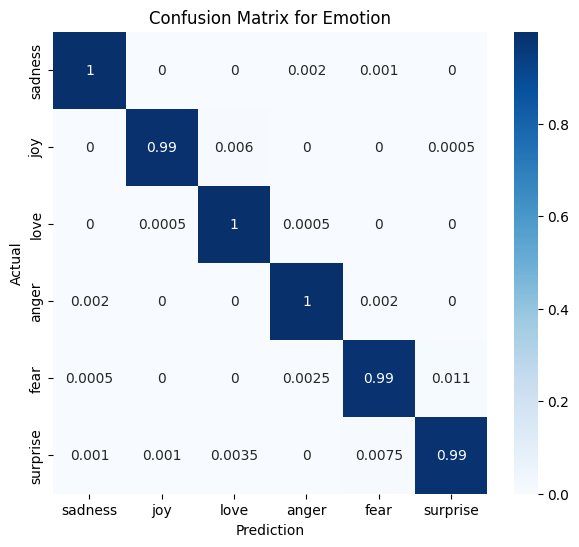

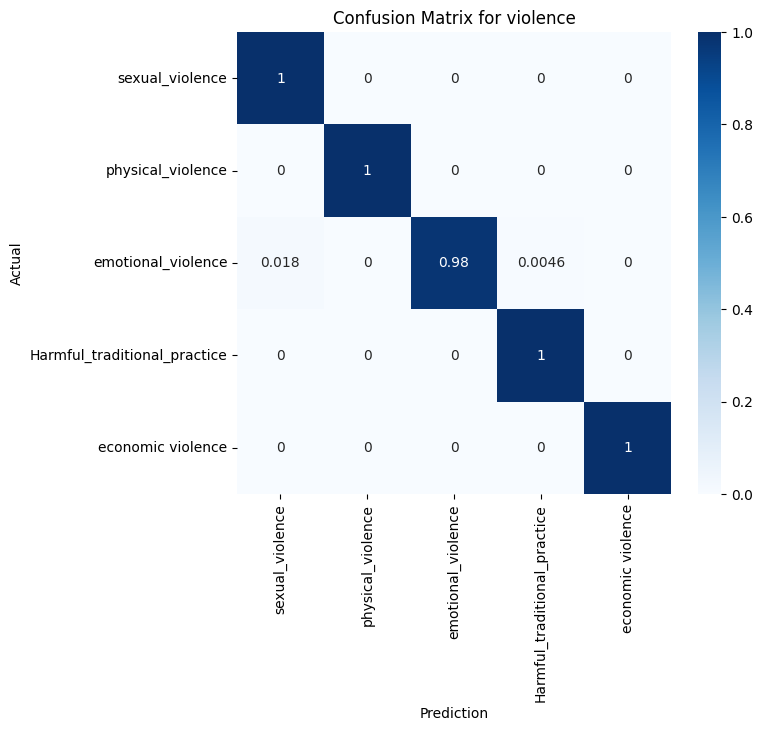

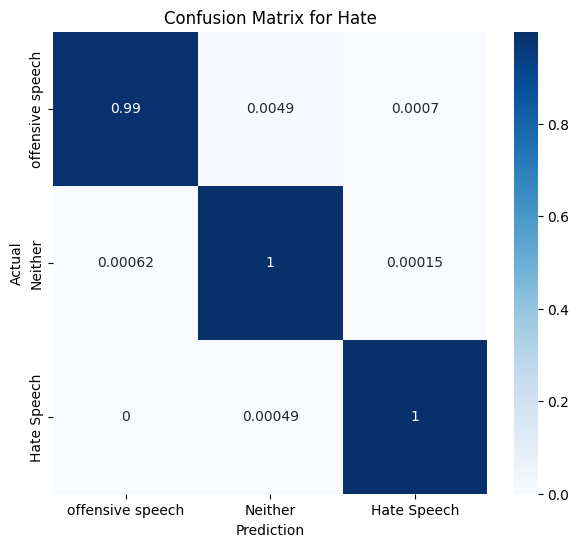

In [213]:
plot_cm(emotion_labels, emotions_pred, 'Confusion Matrix for Emotion', emotion_labels_text)
plot_cm(violence_label, violence_pred, 'Confusion Matrix for violence', violence_labels_text)
plot_cm(hate_label, hate_pred, 'Confusion Matrix for Hate', hate_labels_text)

In [241]:
def classify(input_text):
    input_cleaned=remove(input_text)
    input_seq=t.texts_to_sequences(input_cleaned)
    input_padded=pad_sequences(input_seq,maxlen=max_len,padding='post')
    predictions = model.predict({'emotion_input' : input_padded,
                            'violence_input' : input_padded,
                            'hate_input' : input_padded})
    emotion_pred = np.argmax(predictions[0], axis=1)[0]
    violence_pred = np.argmax(predictions[1], axis=1)[0]
    hate_pred = np.argmax(predictions[2], axis=1)[0]
    
    # Define category names
    major = ['emotion', 'violence', 'hate']
    
    # Get max confidence scores from each category
    max_confidences = [np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])]
    
    # Determine which category has the highest confidence
    major_ind = np.argmax(max_confidences)
    major_label = major[major_ind]
    
    # Define label texts
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
    hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']
    
    # Determine the sub-label based on which major category was selected
    if major_label == 'emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_label == 'violence':
        sub_label = violence_labels_text[violence_pred]
    else:  # hate
        sub_label = hate_labels_text[hate_pred]
    
    return major_label, sub_label


In [242]:
!pip install ipywidgets

In [243]:
import ipywidgets as widgets

In [244]:
from IPython.display import display

In [245]:
input_text=widgets.Text(
    description='input text :',
    placeholder= 'enter your text :'
)

In [ ]:
button=widgets.Button(description='classify')

In [247]:
output=widgets.Output()


In [248]:
def on_button_click(b):
    with output:
        output.clear_output()
        inputt_text=input_text.value
        major_label,sub_label=classify(inputt_text)
        print(major_label)
        print(sub_label)
        


In [249]:
button.on_click(on_button_click)

In [250]:
display(input_text,button,output)

Text(value='', description='input text :', placeholder='enter your text :')

Button(description='classify', style=ButtonStyle())

Output()